#### *ISEL - DEI - LEIM*
## Aprendizagem Automática [T52D]
### **Trabalho Laboratorial 1:** *Pima Indians Diabetes Dataset*

- João Madeira ($48630$),
- Renata Góis ($51038$),
- Bruno Pereira ($51811$)

**Docente responsável:** Prof. Gonçalo Xufre Silva

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### **1.** Análise da base de dados
---

In [13]:
with open("pimaDiabetes.p", "rb") as f:
    dataset = pickle.load(f)
print("Tipo:", type(dataset))

X = dataset.data   # features
y = dataset.target # labels
print("\nDimensão de X:", X.shape)
print("Dimensão de y:", y.shape)

Tipo: <class 'sklearn.utils._bunch.Bunch'>

Dimensão de X: (768, 8)
Dimensão de y: (768,)


O *Pima Indians Diabetes Dataset*, originalmente desenvolvido pelo Instituto Nacional de Diabetes e Doenças
Digestivas e Renais dos Estados Unidos da America, contém informações sobre $768$ mulheres de uma das tribos indígenas desse país. Devido a uma alta taxa de incidencia de diabetes, a população dos índios Pima tem estado sobre contínua vigilância pelo Instituto desde 1965, cada residente tendo sido submetido a um exame padronizado cada dois anos. 

Nos dados disponibilizados, $500$ mulheres não têm diabetes e $268$ sim. \
A informação recolhida consiste nas seguintes $8$ características:

In [14]:
features = getattr(dataset, "feature_names", None)

means = np.mean(X, axis=0);stds = np.std(X, axis=0); mins = np.min(X, axis=0); maxs = np.max(X, axis=0)
for i, name in enumerate(features):
    print(f"{i+1}. {name:80s}  min={mins[i]:0.3f}  max={maxs[i]:0.2f}  média={means[i]:0.2f}  var={stds[i]:0.2f}")

1. Number of times pregnant                                                          min=0.000  max=17.00  média=3.85  var=3.37
2. Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)  min=0.000  max=199.00  média=120.89  var=31.95
3. Diastolic Blood Pressure (mm Hg)                                                  min=0.000  max=122.00  média=69.11  var=19.34
4. Triceps skin fold thickness (mm)                                                  min=0.000  max=99.00  média=20.54  var=15.94
5. 2-Hour Serum insulin (µh/ml)                                                      min=0.000  max=846.00  média=79.80  var=115.17
6. Body mass index [weight in kg/(Height in m)]                                      min=0.000  max=67.10  média=31.99  var=7.88
7. Diabetes pedigree function                                                        min=0.078  max=2.42  média=0.47  var=0.33
8. Age (years)                                                                       min=21

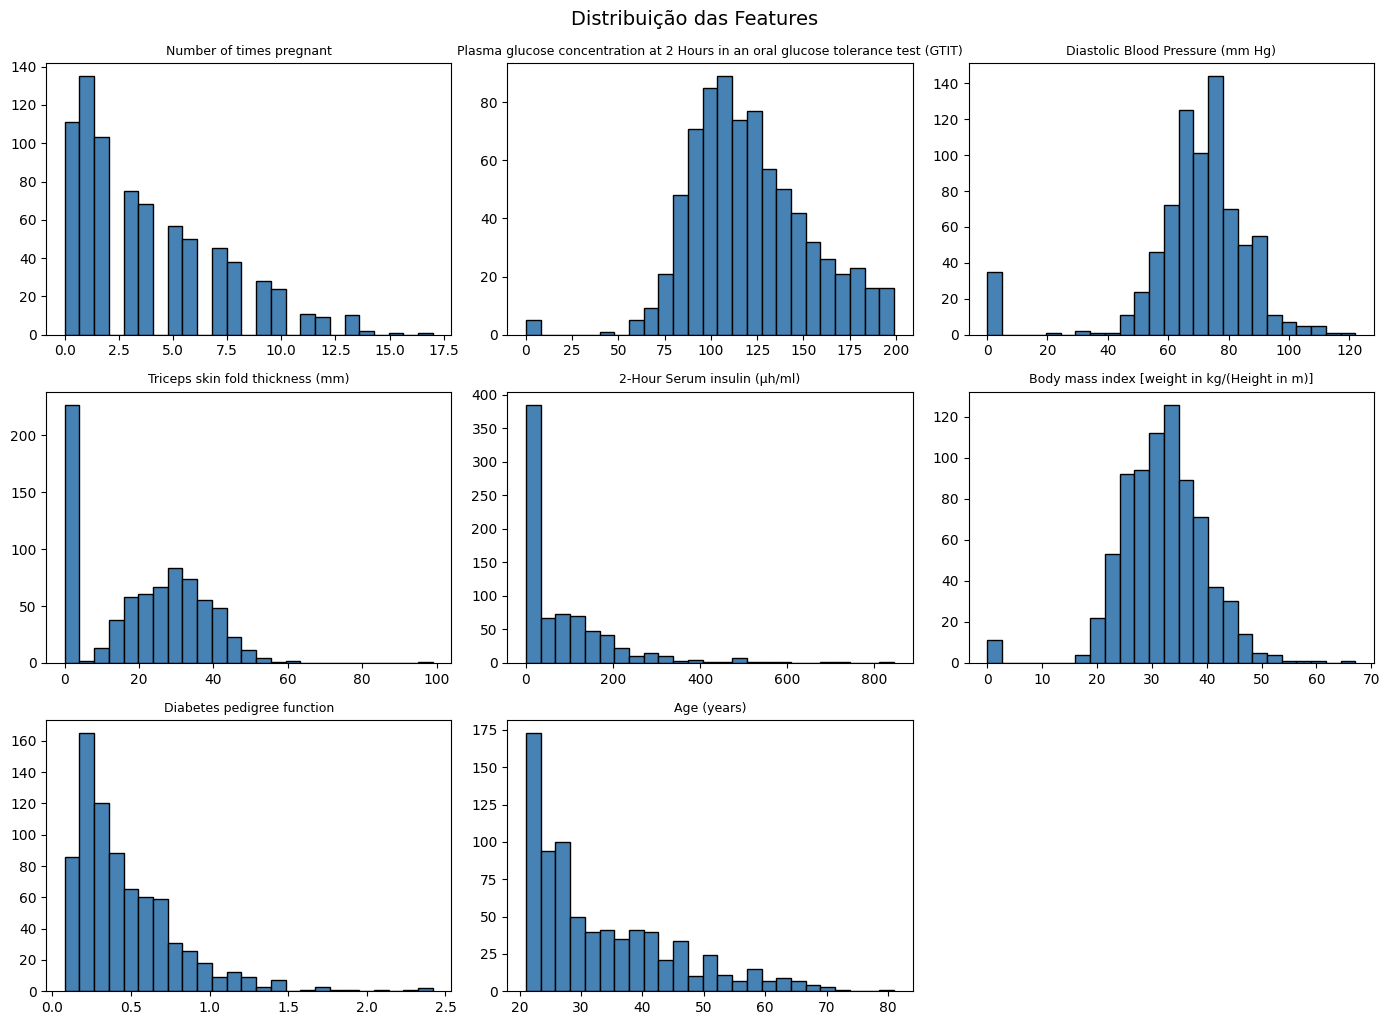

In [15]:
n_features = X.shape[1]
plt.figure(figsize=(14, 10))

for i in range(n_features):
    plt.subplot(3, 3, i+1)
    plt.hist(X[:, i], bins=25, color='steelblue', edgecolor='black')
    plt.title(features[i], fontsize=9)
    plt.tight_layout()

plt.suptitle("Distribuição das Features", y=1.02, fontsize=14)
plt.show()

#### 2. Análise dos resultados
---

=== PREPARAÇÃO DOS DADOS E MÉTRICAS PARA CLASSIFICAÇÃO BINÁRIA ===

1. PRÉ-PROCESSAMENTO DOS DADOS:
   - Plasma glucose concentration at 2 Hours in an oral zeros:   5 (0.7%)
   - Diastolic Blood Pressure (mm Hg)                   zeros:  35 (4.6%)
   - Triceps skin fold thickness (mm)                   zeros: 227 (29.6%)
   - 2-Hour Serum insulin (µh/ml)                       zeros: 374 (48.7%)
   - Body mass index [weight in kg/(Height in m)]       zeros:  11 (1.4%)
   ✅ Valores missing substituídos pela mediana
   ✅ Dados normalizados (média=0, std=1)

2. DIVISÃO ESTRATIFICADA DOS DADOS:
   Dados não normalizados:
     • Treino: 614 amostras (34.9% positivas)
     • Teste:  154 amostras (35.1% positivas)
   Dados normalizados:
     • Treino: 614 amostras (34.9% positivas)
     • Teste:  154 amostras (35.1% positivas)

3. ANÁLISE DO DESBALANÇO DE CLASSES:
Classe 0 (Não Diabetes): 500 amostras (65.1%)
Classe 1 (Diabetes):     268 amostras (34.9%)
Razão negativos/positivos: 1.87:1
⚠️  A

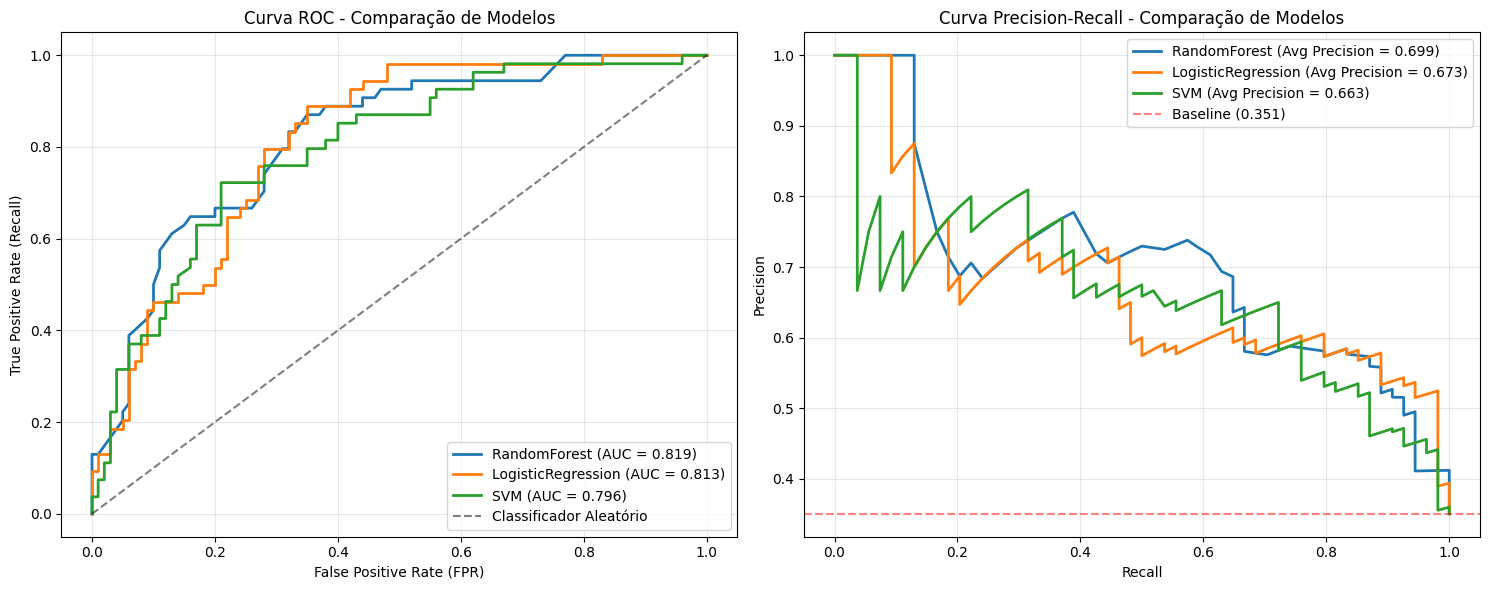


5. ANÁLISE FINAL E RECOMENDAÇÕES:
Comparação de Desempenho (ordenado por F1-Score):
------------------------------------------------------------
1. RandomForest         F1=0.660 | Recall=0.611 | Precision=0.717 | AUC=0.819 | FN=21
2. SVM                  F1=0.586 | Recall=0.537 | Precision=0.644 | AUC=0.796 | FN=25
3. LogisticRegression   F1=0.540 | Recall=0.500 | Precision=0.587 | AUC=0.813 | FN=27

🎯 RECOMENDAÇÃO PARA CONTEXTO MÉDICO:
Modelo recomendado: RandomForest
Motivo: Melhor balanceamento F1-Score (0.660) com Recall aceitável (0.611)
⚠️  ATENÇÃO: Recall baixo (0.611) - muitos casos de diabetes podem não ser detectados!
   Considere ajustar limiar para priorizar Recall em detrimento da Precision

✅ Falsos Negativos no melhor modelo: 21
   (Cada falso negativo representa um paciente com diabetes não diagnosticado)

6. RESUMO DA METODOLOGIA IMPLEMENTADA:
✅ Pré-processamento: Tratamento de zeros biologicamente impossíveis
✅ Normalização: Dados com média=0 e std=1
✅ Divisão estrat

In [16]:
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, 
                             confusion_matrix,
                             f1_score, recall_score, precision_score, accuracy_score,
                             roc_auc_score, average_precision_score)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer

print("=== PREPARAÇÃO DOS DADOS E MÉTRICAS PARA CLASSIFICAÇÃO BINÁRIA ===\n")

# 1. PRÉ-PROCESSAMENTO DOS DADOS
print("1. PRÉ-PROCESSAMENTO DOS DADOS:")
print("=" * 50)

# Substituir zeros por NaN nas features críticas
X_clean = X.copy()
critical_features_indices = [1, 2, 3, 4, 5]  # Índices das features críticas

for i in critical_features_indices:
    zero_mask = X[:, i] == 0
    zero_count = np.sum(zero_mask)
    X_clean[zero_mask, i] = np.nan
    print(f"   - {features[i][:50]:50s} zeros: {zero_count:3d} ({zero_count/len(X)*100:0.1f}%)")

# Preencher valores missing com a mediana
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_clean)
print("   ✅ Valores missing substituídos pela mediana")

# Normalização dos dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)
print("   ✅ Dados normalizados (média=0, std=1)")

# 2. DIVISÃO ESTRATIFICADA DOS DADOS
print("\n2. DIVISÃO ESTRATIFICADA DOS DADOS:")
print("=" * 50)

# Divisão estratificada (mantém proporção das classes)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42, shuffle=True
)

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_normalized, y, test_size=0.2, stratify=y, random_state=42, shuffle=True
)

print(f"   Dados não normalizados:")
print(f"     • Treino: {X_train.shape[0]} amostras ({np.bincount(y_train)[1]/len(y_train)*100:.1f}% positivas)")
print(f"     • Teste:  {X_test.shape[0]} amostras ({np.bincount(y_test)[1]/len(y_test)*100:.1f}% positivas)")

print(f"   Dados normalizados:")
print(f"     • Treino: {X_train_norm.shape[0]} amostras ({np.bincount(y_train_norm)[1]/len(y_train_norm)*100:.1f}% positivas)")
print(f"     • Teste:  {X_test_norm.shape[0]} amostras ({np.bincount(y_test_norm)[1]/len(y_test_norm)*100:.1f}% positivas)")

# 3. ANÁLISE DO DESBALANÇO DE CLASSES
print("\n3. ANÁLISE DO DESBALANÇO DE CLASSES:")
print("=" * 50)

class_counts = np.bincount(y)
total_samples = len(y)
positive_ratio = class_counts[1] / total_samples
negative_ratio = class_counts[0] / total_samples

print(f"Classe 0 (Não Diabetes): {class_counts[0]} amostras ({negative_ratio*100:.1f}%)")
print(f"Classe 1 (Diabetes):     {class_counts[1]} amostras ({positive_ratio*100:.1f}%)")
print(f"Razão negativos/positivos: {class_counts[0]/class_counts[1]:.2f}:1")

# RISCO: Classificador trivial que sempre prevê "não diabetes" teria:
trivial_accuracy = negative_ratio
print(f"⚠️  Accuracy de classificador trivial: {trivial_accuracy:.1%}")
print("   → Métricas como accuracy são ENGANOSAS neste contexto!\n")

# 4. FUNÇÃO DE AVALIAÇÃO COMPLETA PARA BINÁRIO
def evaluate_binary_classifier(model, X_test, y_test, model_name="Modelo", threshold=0.5):
    """
    Avaliação completa para classificação binária com métricas específicas
    """
    # Previsões com probabilidades
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_proba = None
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Métricas usando sklearn (mais robustas)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)  # Sensibilidade
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Métricas específicas para binário
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fnr = FN / (TP + FN) if (TP + FN) > 0 else 0  # False Negative Rate
    fpr = FP / (TN + FP) if (TN + FP) > 0 else 0  # False Positive Rate
    
    # AUC-ROC se tivermos probabilidades
    roc_auc = None
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"\n📊 {model_name} - Avaliação Detalhada:")
    print("=" * 40)
    print(f"Matriz de Confusão:")
    print(f"                Previsto")
    print(f"             0       1")
    print(f"Real  0   [{TN:4d}   {FP:4d}]")
    print(f"      1   [{FN:4d}   {TP:4d}]")
    
    print(f"\n📈 Métricas de Desempenho:")
    print(f"  • Accuracy:    {accuracy:.3f}")
    print(f"  • Precision:   {precision:.3f}  (PPV)")
    print(f"  • Recall:      {recall:.3f}  (Sensibilidade)")
    print(f"  • F1-Score:    {f1:.3f}")
    print(f"  • Specificity: {specificity:.3f}")
    print(f"  • FPR:         {fpr:.3f}  (False Alarm Rate)")
    print(f"  • FNR:         {fnr:.3f}  (Missed Detection)")
    
    if roc_auc is not None:
        print(f"  • AUC-ROC:     {roc_auc:.3f}")
    
    # Análise crítica baseada no contexto médico
    print(f"\n⚠️  Análise Crítica (Contexto Médico):")
    print(f"  • Falsos Negativos: {FN} pacientes com diabetes NÃO detectados")
    print(f"  • Falsos Positivos: {FP} pacientes saudáveis com falso alarme")
    
    return {
        'cm': cm, 'accuracy': accuracy, 'precision': precision, 
        'recall': recall, 'f1': f1, 'specificity': specificity,
        'fpr': fpr, 'fnr': fnr, 'roc_auc': roc_auc, 'y_proba': y_proba
    }

# 5. FUNÇÃO PARA CURVAS DE AVALIAÇÃO
def plot_comprehensive_curves(models_results, X_test, y_test):
    """
    Plot curvas ROC e Precision-Recall para comparação
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Curva ROC
    for name, result in models_results.items():
        if result['y_proba'] is not None:
            fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
            roc_auc = result['roc_auc']
            ax1.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
    
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Classificador Aleatório')
    ax1.set_xlabel('False Positive Rate (FPR)')
    ax1.set_ylabel('True Positive Rate (Recall)')
    ax1.set_title('Curva ROC - Comparação de Modelos')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Curva Precision-Recall
    for name, result in models_results.items():
        if result['y_proba'] is not None:
            precision, recall, _ = precision_recall_curve(y_test, result['y_proba'])
            avg_precision = average_precision_score(y_test, result['y_proba'])
            ax2.plot(recall, precision, label=f'{name} (Avg Precision = {avg_precision:.3f})', linewidth=2)
    
    # Linha de baseline para Precision-Recall
    baseline = np.sum(y_test) / len(y_test)
    ax2.axhline(y=baseline, color='r', linestyle='--', alpha=0.5, label=f'Baseline ({baseline:.3f})')
    
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Curva Precision-Recall - Comparação de Modelos')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 6. IMPLEMENTAÇÃO DE DISCRIMINANTES LINEARES (SOLUÇÃO ANALÍTICA)
# Não implementado

# 7. EXEMPLO DE AVALIAÇÃO COM MODELOS
print("\n4. AVALIAÇÃO DE MODELOS DE CLASSIFICAÇÃO:")
print("=" * 50)

# Definir classificadores
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Avaliar cada classificador
models_results = {}

for name, model in classifiers.items():
    print(f"\n🔍 Treinando {name}...")
    
    model.fit(X_train_norm, y_train_norm)
    result = evaluate_binary_classifier(model, X_test_norm, y_test_norm, name)
    
    models_results[name] = result

# Plotar curvas comparativas
print("\n📊 PLOTANDO CURVAS COMPARATIVAS...")
plot_comprehensive_curves(models_results, X_test_norm, y_test_norm)

# 8. ANÁLISE DE TRADE-OFF E RECOMENDAÇÕES
print("\n5. ANÁLISE FINAL E RECOMENDAÇÕES:")
print("=" * 50)

# Comparar desempenho
print("Comparação de Desempenho (ordenado por F1-Score):")
print("-" * 60)

performance_summary = []
for name, result in models_results.items():
    performance_summary.append({
        'Modelo': name,
        'F1-Score': result['f1'],
        'Recall': result['recall'],
        'Precision': result['precision'],
        'AUC-ROC': result['roc_auc'] if result['roc_auc'] else 0,
        'Falsos_Negativos': result['cm'][1, 0]  # FN da matriz de confusão
    })

# Ordenar por F1-Score
performance_summary.sort(key=lambda x: x['F1-Score'], reverse=True)

for i, perf in enumerate(performance_summary, 1):
    print(f"{i}. {perf['Modelo']:20} F1={perf['F1-Score']:.3f} | "
          f"Recall={perf['Recall']:.3f} | Precision={perf['Precision']:.3f} | "
          f"AUC={perf['AUC-ROC']:.3f} | FN={perf['Falsos_Negativos']}")

# Recomendação baseada no contexto médico
print(f"\n🎯 RECOMENDAÇÃO PARA CONTEXTO MÉDICO:")
best_model = performance_summary[0]
print(f"Modelo recomendado: {best_model['Modelo']}")
print(f"Motivo: Melhor balanceamento F1-Score ({best_model['F1-Score']:.3f}) "
      f"com Recall aceitável ({best_model['Recall']:.3f})")

# Análise de trade-off
if best_model['Recall'] < 0.7:
    print(f"⚠️  ATENÇÃO: Recall baixo ({best_model['Recall']:.3f}) - muitos casos de diabetes podem não ser detectados!")
    print("   Considere ajustar limiar para priorizar Recall em detrimento da Precision")

print(f"\n✅ Falsos Negativos no melhor modelo: {best_model['Falsos_Negativos']}")
print("   (Cada falso negativo representa um paciente com diabetes não diagnosticado)")

print("\n6. RESUMO DA METODOLOGIA IMPLEMENTADA:")
print("=" * 50)
print("✅ Pré-processamento: Tratamento de zeros biologicamente impossíveis")
print("✅ Normalização: Dados com média=0 e std=1")
print("✅ Divisão estratificada: Mantém proporção de classes")
print("✅ Métricas específicas: Foco em Recall, Precision, F1-Score")
print("✅ Curvas de avaliação: ROC e Precision-Recall")
print("✅ Análise contextual: Foco em reduzir falsos negativos")
print("✅ Comparação justa: Mesmas condições para todos os modelos")